In [22]:
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

## Функции:

In [23]:
def plot_correlation_matrix(corr_mtrx):
    f = plt.figure(figsize=(8, 8))
    plt.matshow(corr_mtrx, fignum=f.number)
    plt.xticks(range(corr_mtrx.shape[1]), fontsize=9, rotation=45)
    plt.yticks(range(corr_mtrx.shape[1]), fontsize=9)
    cb = plt.colorbar()
    plt.title('Correlation Matrix', fontsize=10)
    
def correlation_matrix(x):
    result = np.corrcoef(x, rowvar = False)
    return result

def delete_nan(corr_matrix):
    fd = []
    for i in range(corr_matrix.shape[0]):
        if math.isnan(corr_matrix[i][i]):
            fd.append(i)
    corr_matrix = np.delete(corr_matrix, fd, axis = 0)
    corr_matrix = np.delete(corr_matrix, fd, axis = 1)
    return corr_matrix

def delete_feature(corr_matrix):
    S_Rcoef = abs(corr_matrix).sum(axis = 1)
    d = np.sort(S_Rcoef)
    mask = (S_Rcoef == d[-1])+(S_Rcoef == d[-2])+(S_Rcoef == d[-3])
    indices = np.where(mask)
    return indices

## Обработка данных

Загружаем датасет:

In [24]:
data = pd.read_csv('weatherAUS.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [31]:
data.WindGustDir.isna().mean()

0.06561504434114197

In [39]:
data.WindGustDir.dropna().

TypeError: 

Посчитаем количество локаций:

In [4]:
data["Location"].unique().size

49


- __Бинарные признаки__:  (RainToday и RainTomorrow) "No" - '0', "Yes" - '1';


- __Количественные признаки__: Тут их большинство, оставляем в той же форме, единственно "NaN" заменяем на значение медианы или среднего;


- __Порядковые признаки__: Date. Пусть дата будет характеризоватся числом дня во временном промежутке в выборке - от __1__ до __n__, где __n__ - количество объектов выборки.;


- __Номинальные признаки__: (Все признаки, определяющие направление ветра).  Направление ветра - азимутом в градусах

In [5]:
targ = data["RainTomorrow"]

In [19]:
wind = ['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW']
azimuth = [270, 292.5, 247.5, 45, 337.5, 0, 22.5, 225, 67.5, 157.5, 180, 315, 135, 112.5, 90, 202.5]



def a(x):
    if x == "Yes":
        x = 1.0
    if x == "No":
        x = 0.0
    if type(x) == str and x != "Yes":
        for i in range(len(wind)):
            if x == wind[i]:
                x = azimuth[i]
    return x

def b(x):
    if type(x) != str and math.isnan(x):
        x = 0.0
    return x

targ = targ.map(lambda x: a(x))
data = data.applymap(lambda x: a(x))



16

16

In [7]:
#Заменим пропуски в "ветре" и "облаках" значением медианы
wind = data[['WindGustDir', "WindDir9am"]].fillna(np.median(data[['WindGustDir', "WindDir9am"]]))
cloud = data[['Cloud9am', "Cloud3pm"]].fillna(np.median(data['Cloud9am'][data['Cloud9am'] >= 0]  ))
Rainfall = data["Rainfall"].fillna(np.mean(data["Rainfall"]))
WindGust = data["WindGustSpeed"].fillna(np.median(data["WindGustSpeed"]))
Speed3pm = data["WindSpeed3pm"].fillna(np.median(data["WindSpeed3pm"]))
Speed9pm = data["WindSpeed9am"].fillna(np.median(data["WindSpeed9am"]))
data.drop(["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm",
           'WindGustDir', "WindDir9am", "RainTomorrow", "WindGustSpeed",
          "WindSpeed3pm", "WindSpeed9am", "Rainfall"], axis=1, inplace=True)


data = pd.concat([data, Rainfall, wind, WindGust, Speed3pm, Speed9pm, cloud, targ], axis = 1)

In [13]:
wind = data[['WindGustDir', "WindDir9am"]].fillna(np.median(data[['WindGustDir', "WindDir9am"]].dropna()))

In [17]:
np.median(data[['WindGustDir', "WindDir9am"]].dropna())

157.5

In [14]:
wind.isna().mean()

WindGustDir    0.0
WindDir9am     0.0
dtype: float64

In [18]:
data[['WindGustDir', "WindDir9am"]]

,WindGustDir,WindDir9am
0,270.0,270.0
1,292.5,337.5
2,247.5,270.0
3,45.0,135.0
4,270.0,67.5
...,...,...
142188,90.0,112.5
142189,90.0,135.0
142190,337.5,135.0
142191,0.0,135.0


In [8]:
data = data.applymap(lambda x: b(x))
data

,Date,Location,MinTemp,MaxTemp,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,...,RISK_MM,Rainfall,WindGustDir,WindDir9am,WindGustSpeed,WindSpeed3pm,WindSpeed9am,Cloud9am,Cloud3pm,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,292.5,71.0,22.0,1007.7,1007.1,16.9,...,0.0,0.6,270.0,270.0,44.0,24.0,20.0,8.0,5.0,0.0
1,2008-12-02,Albury,7.4,25.1,247.5,44.0,25.0,1010.6,1007.8,17.2,...,0.0,0.0,292.5,337.5,44.0,22.0,4.0,5.0,5.0,0.0
2,2008-12-03,Albury,12.9,25.7,247.5,38.0,30.0,1007.6,1008.7,21.0,...,0.0,0.0,247.5,270.0,46.0,26.0,19.0,5.0,2.0,0.0
3,2008-12-04,Albury,9.2,28.0,90.0,45.0,16.0,1017.6,1012.8,18.1,...,1.0,0.0,45.0,135.0,24.0,9.0,11.0,5.0,5.0,0.0
4,2008-12-05,Albury,17.5,32.3,315.0,82.0,33.0,1010.8,1006.0,17.8,...,0.2,1.0,270.0,67.5,41.0,20.0,7.0,7.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,90.0,59.0,27.0,1024.7,1021.2,9.4,...,0.0,0.0,90.0,112.5,31.0,13.0,15.0,5.0,5.0,0.0
142189,2017-06-21,Uluru,2.8,23.4,67.5,51.0,24.0,1024.6,1020.3,10.1,...,0.0,0.0,90.0,135.0,31.0,11.0,13.0,5.0,5.0,0.0
142190,2017-06-22,Uluru,3.6,25.3,0.0,56.0,21.0,1023.5,1019.1,10.9,...,0.0,0.0,337.5,135.0,22.0,9.0,13.0,5.0,5.0,0.0
142191,2017-06-23,Uluru,5.4,26.9,292.5,53.0,24.0,1021.0,1016.8,12.5,...,0.0,0.0,0.0,135.0,37.0,9.0,9.0,5.0,5.0,0.0


In [9]:
ar = []
series = pd.Series(index = data["Location"].unique())
acc = 0
for i in range(data["Location"].unique().size):
    X_y = []
    s = (data["Location"] == series.index[i]).sum()
    data_ = data[acc : acc+s]
    data_["Date"] = np.array(range(1, s+1))
    X_y.append(data_.drop(["Location", "RainTomorrow"], axis = "columns"))
    X_y.append(data_["RainTomorrow"])
    ar.append(X_y)
    acc += s
    s = 0

<ipython-input-9-c862a2840995>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  series = pd.Series(index = data["Location"].unique())
<ipython-input-9-c862a2840995>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_["Date"] = np.array(range(1, s+1))


### Наивный Байес

In [10]:
%%time
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
prediction_mean = []
for i in range(len(ar)):
    X_train, X_test, y_train, y_test = \
    train_test_split(np.array(ar[i][0]), np.array(ar[i][1]), test_size=0.25, shuffle = False)
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    prediction_mean.append(np.mean(prediction == y_test))
    print (str(series.index[i])+" : "+str(np.mean(prediction == y_test)))
    
    
np.array(prediction_mean).mean()


Albury : 0.949535192563081
BadgerysCreek : 0.8265027322404371
Cobar : 0.9357429718875502
CoffsHarbour : 0.9634641407307172
Moree : 0.9537815126050421
Newcastle : 0.9661705006765899
NorahHead : 0.9686221009549796
NorfolkIsland : 0.9338731443994602
Penrith : 0.9622132253711201
Richmond : 0.9146341463414634
Sydney : 0.9580838323353293
SydneyAirport : 0.9587765957446809
WaggaWagga : 0.9502688172043011
Williamtown : 0.97339593114241
Wollongong : 0.9597855227882037
Canberra : 0.9532163742690059
Tuggeranong : 0.964
MountGinini : 0.9766162310866575
Ballarat : 0.9352708058124174
Bendigo : 0.9367588932806324
Sale : 0.9653333333333334
MelbourneAirport : 0.949535192563081
Melbourne : 0.922824302134647
Mildura : 0.9401595744680851
Nhil : 0.910941475826972
Portland : 0.9238985313751669
Watsonia : 0.9466666666666667
Dartmoor : 0.967391304347826
Brisbane : 0.9671302149178256
Cairns : 0.963855421686747
GoldCoast : 0.9530201342281879
Townsville : 0.9631093544137023
Adelaide : 0.9353169469598965
MountGam

0.9337757015970196

Составим кореляционные матрицы признаков:
    

<ipython-input-2-1036239dee93>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(8, 8))


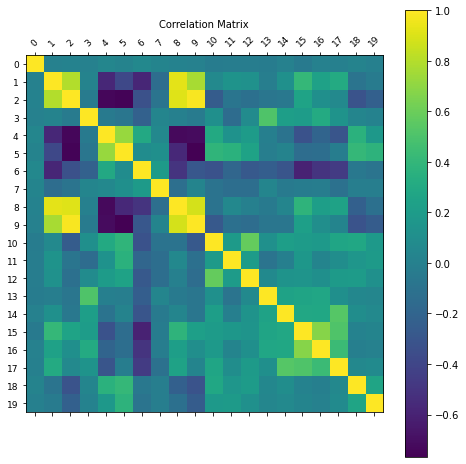

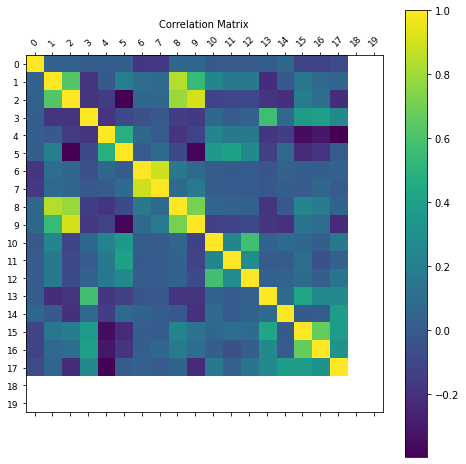

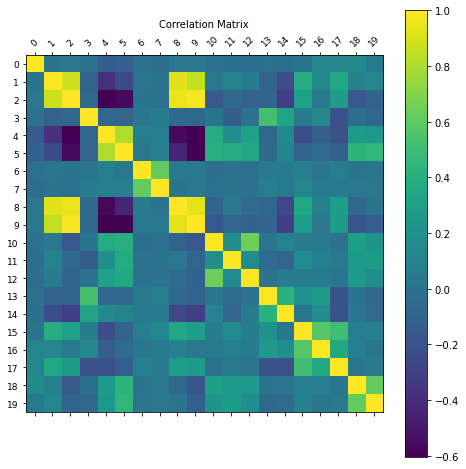

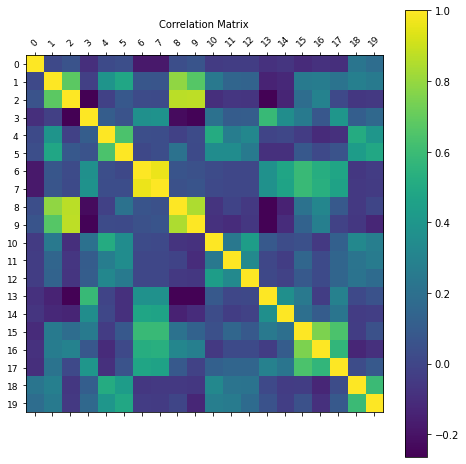

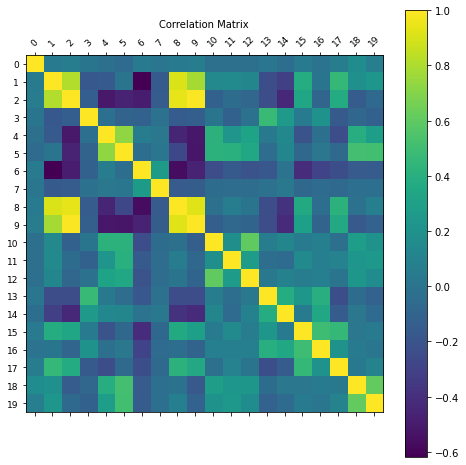

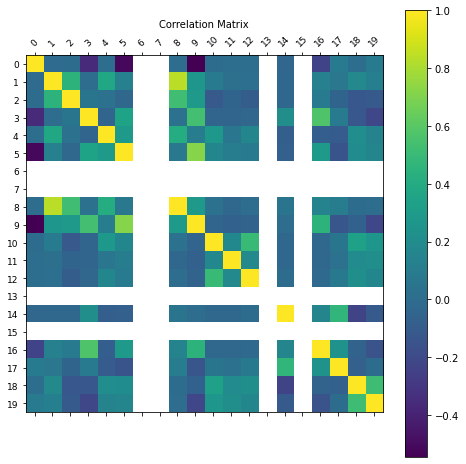

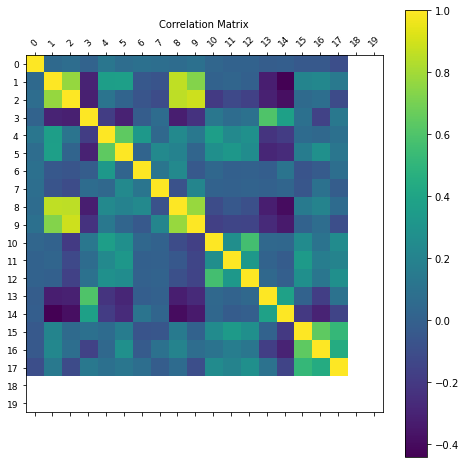

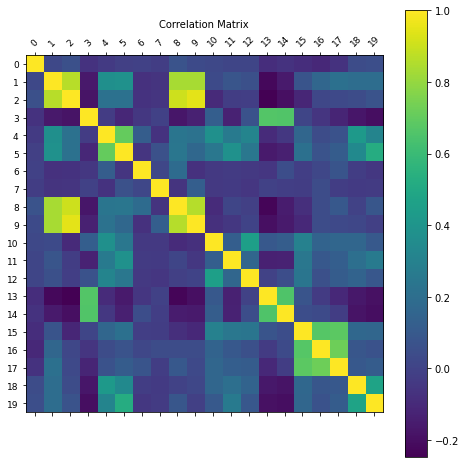

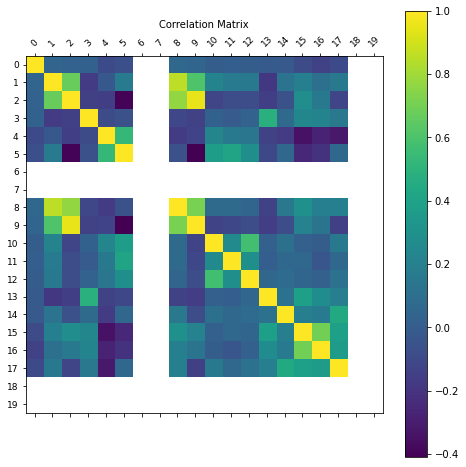

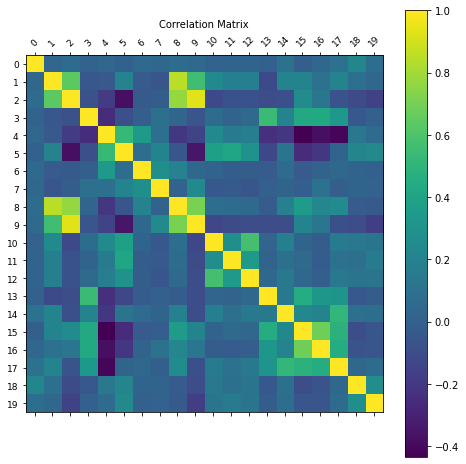

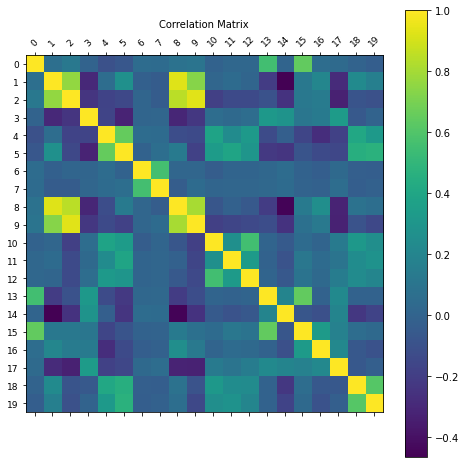

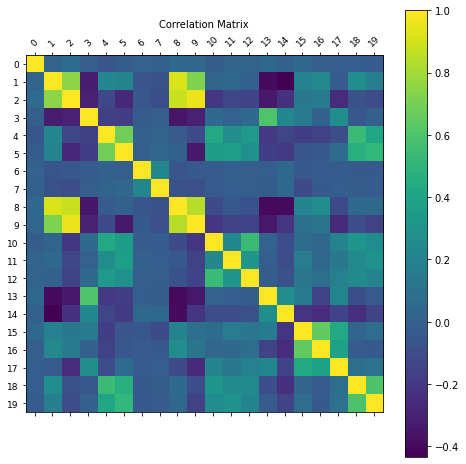

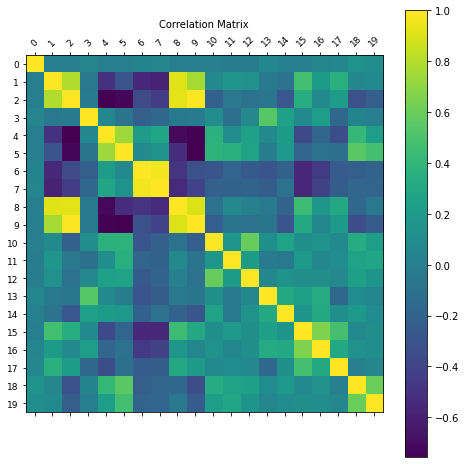

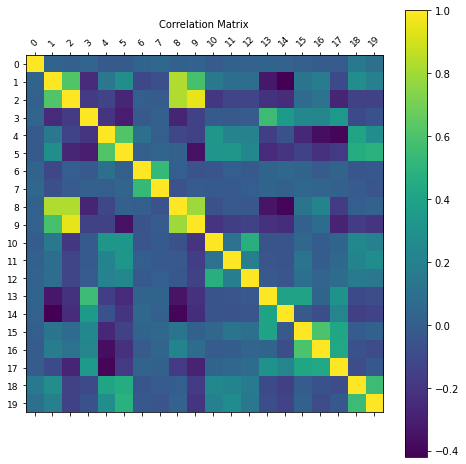

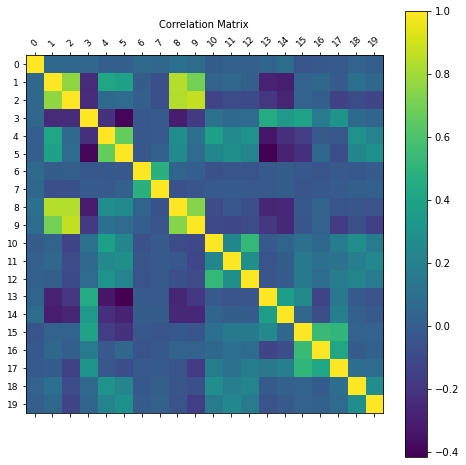

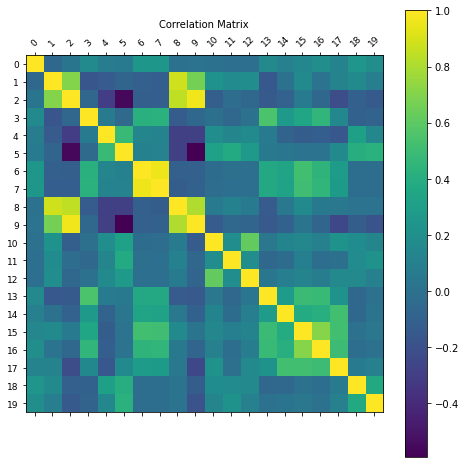

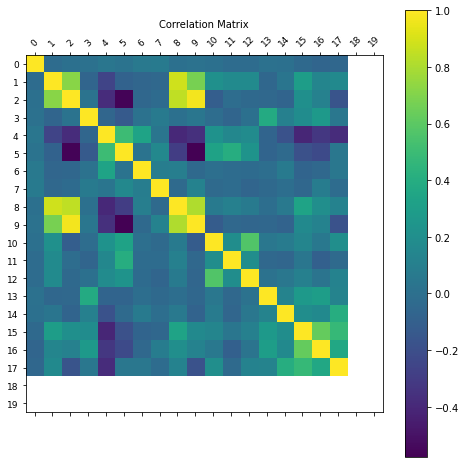

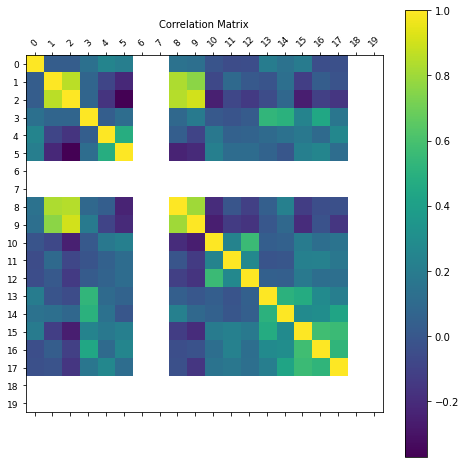

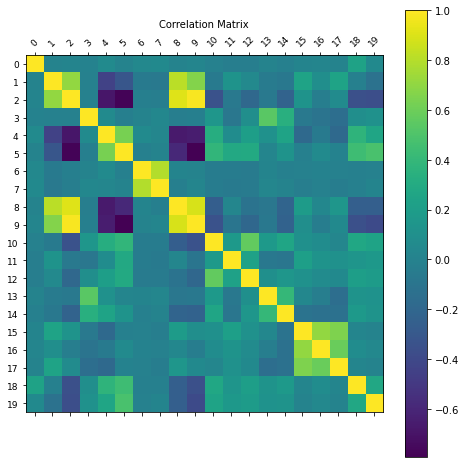

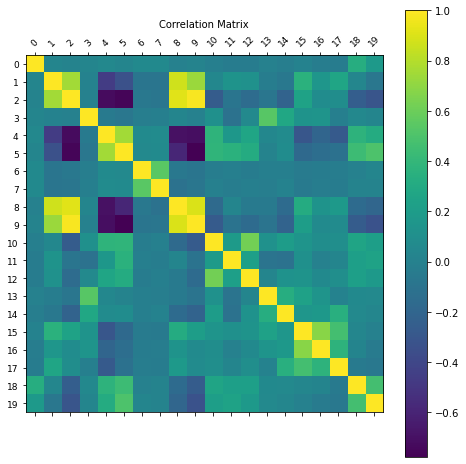

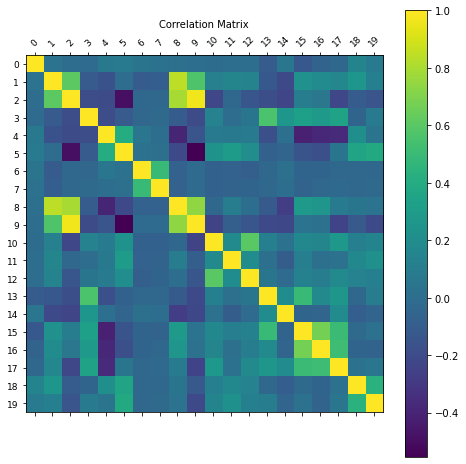

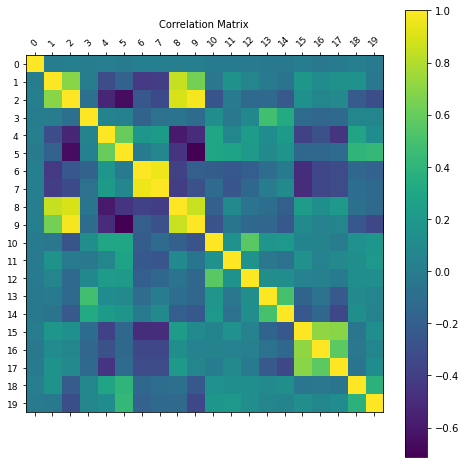

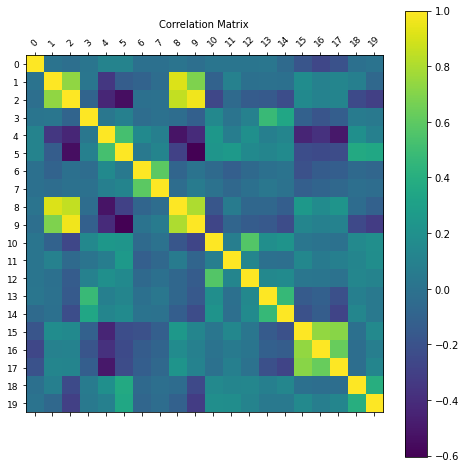

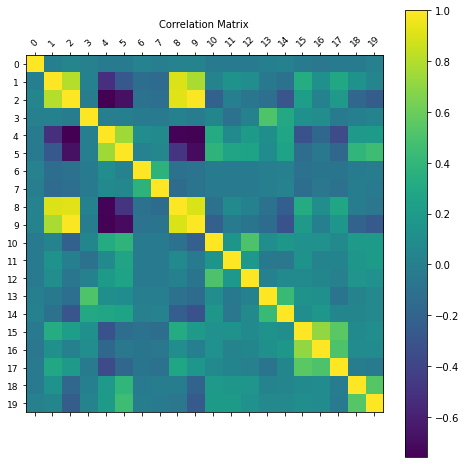

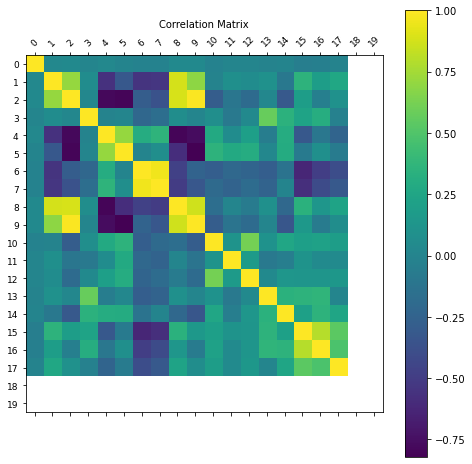

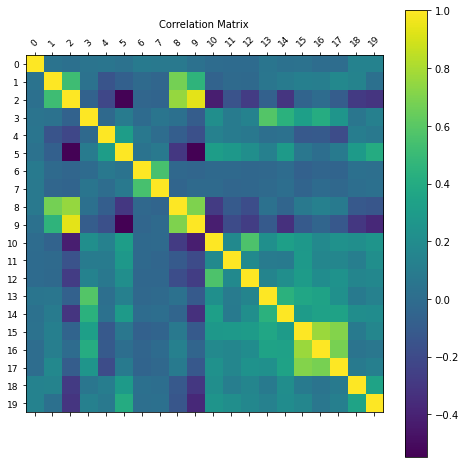

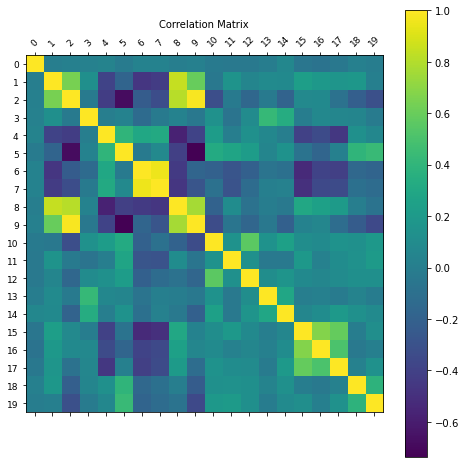

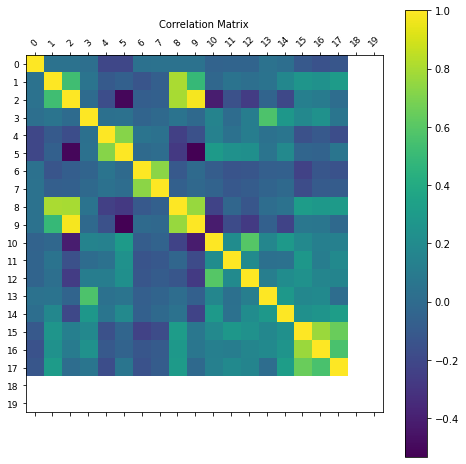

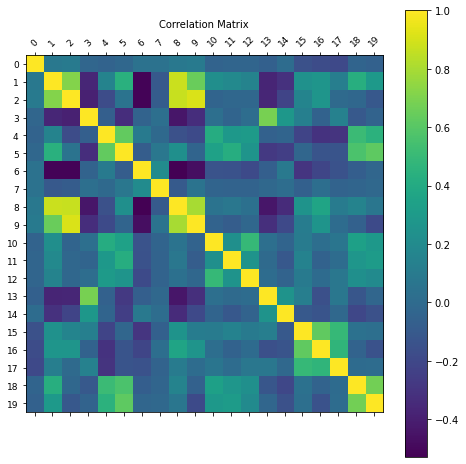

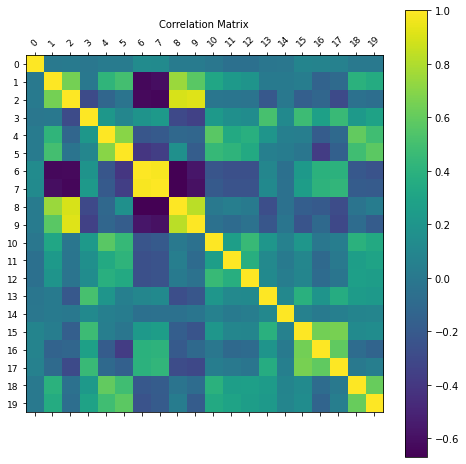

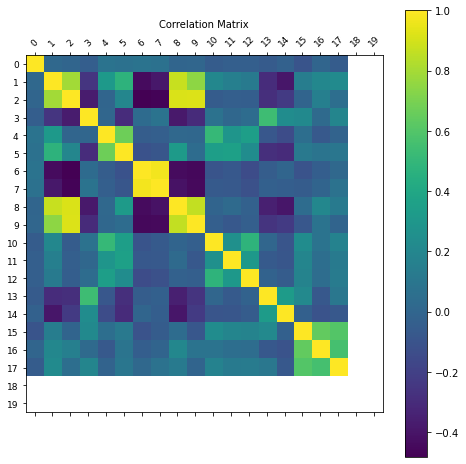

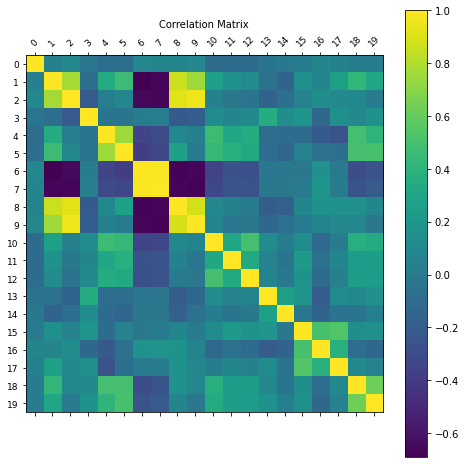

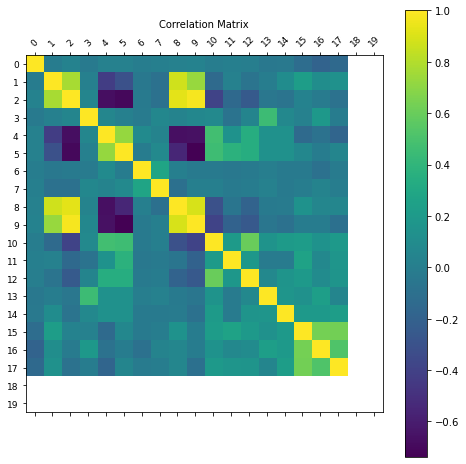

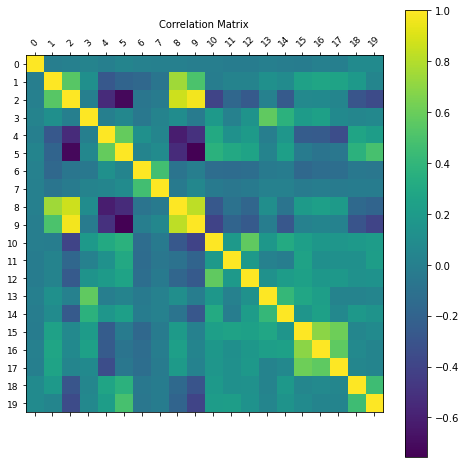

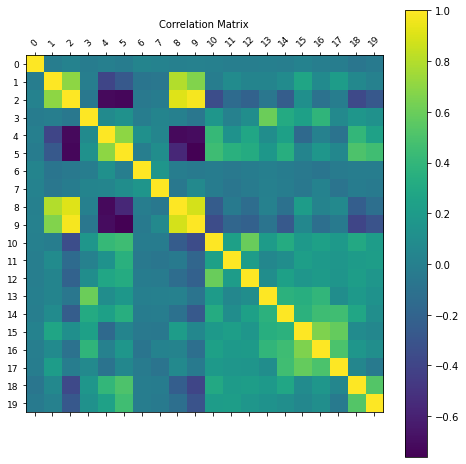

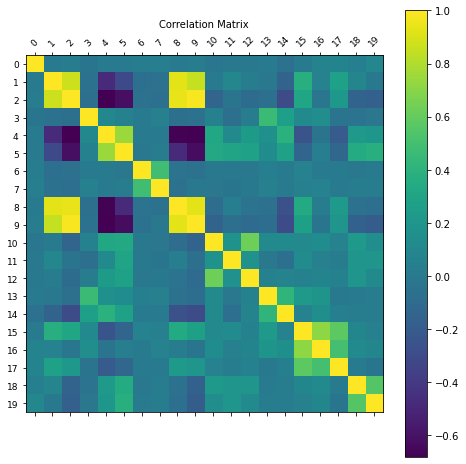

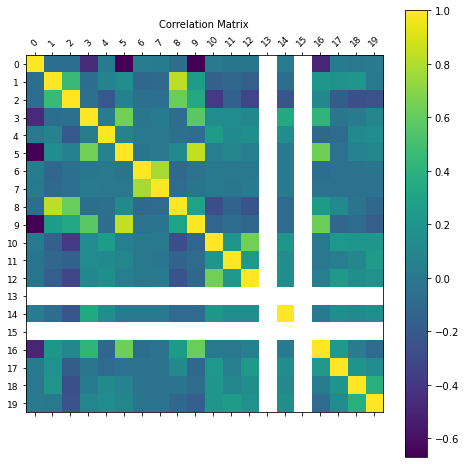

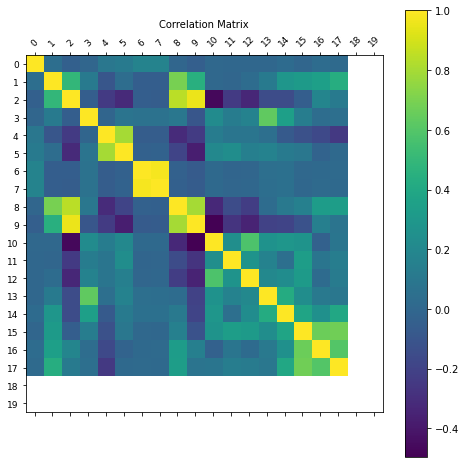

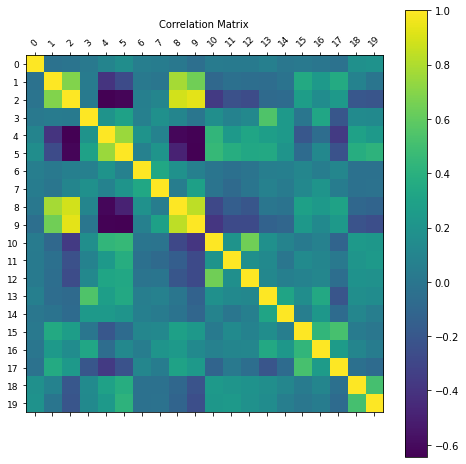

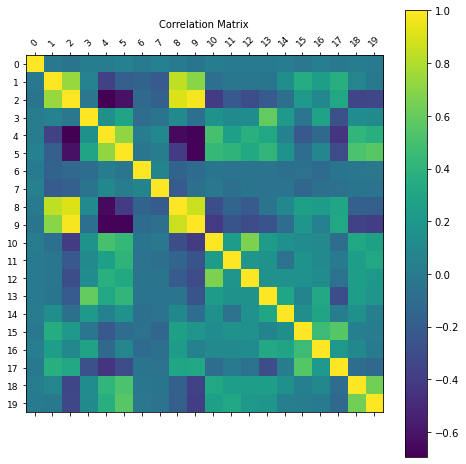

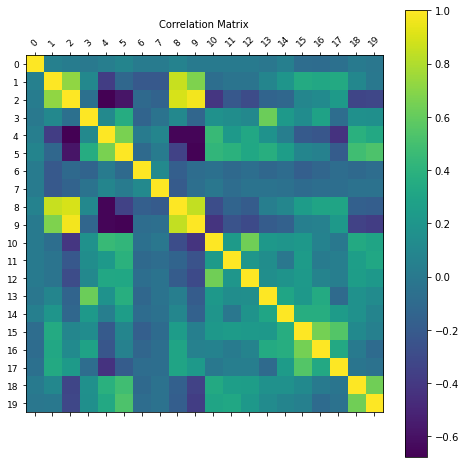

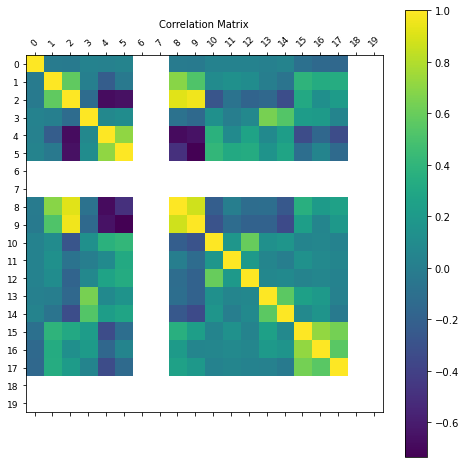

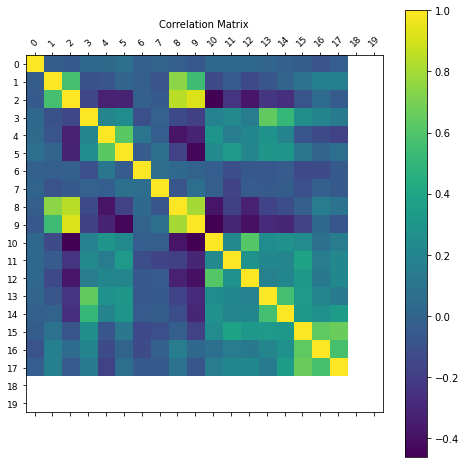

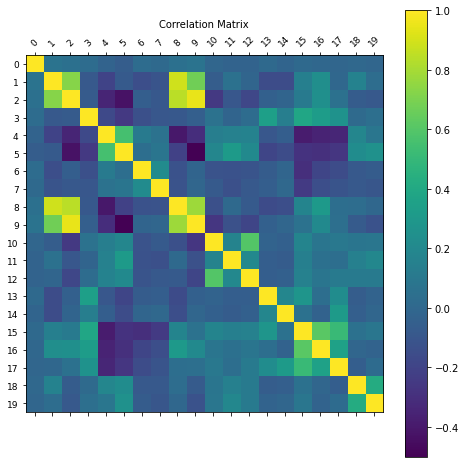

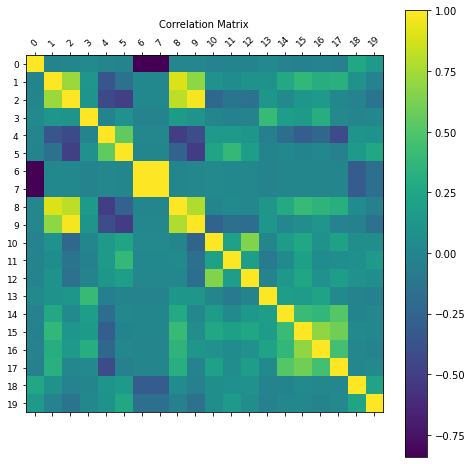

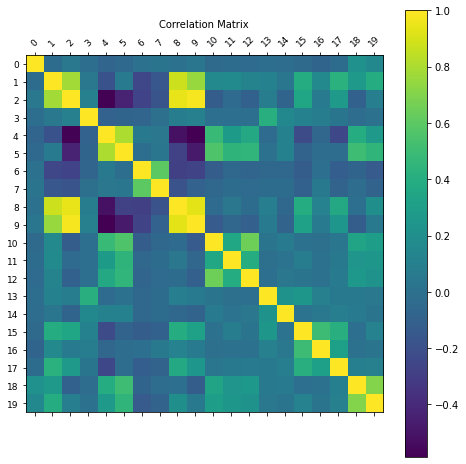

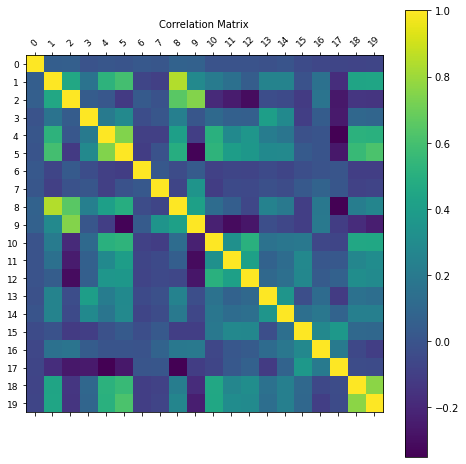

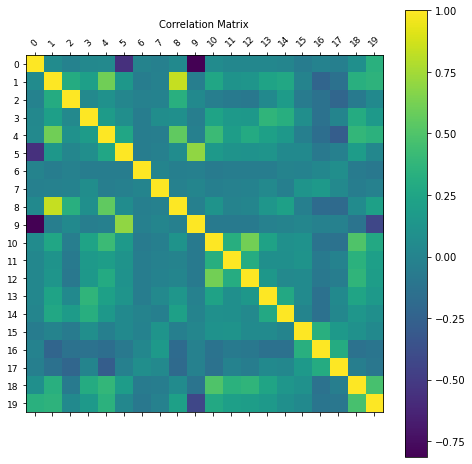

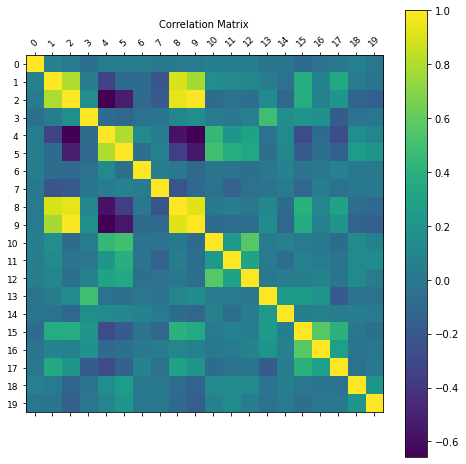

In [11]:
for i in range(len(ar)):
    plot_correlation_matrix(correlation_matrix(ar[i][0]))
    

В большинстве матриц видно, что 1,2,8,9 признаки сильнее скоррелированы 

### После удаления коррелирующих признаков:

In [12]:
%%time
for i in range(len(ar)):
    X_train, X_test, y_train, y_test = \
    train_test_split(np.array(ar[i][0]), np.array(ar[i][1]), test_size=0.25, shuffle = False)
    
    X_train_new = np.delete(X_train, [1,2,8,9], axis=1)
    X_test_new  = np.delete(X_test, [1,2,8,9], axis=1)
    
    classifier.fit(X_train_new, y_train)
    prediction = classifier.predict(X_test_new)
    prediction_mean.append(np.mean(prediction == y_test))
    print (str(series.index[i])+" : "+str(np.mean(prediction == y_test)))
np.array(prediction_mean).mean()


Albury : 0.953519256308101
BadgerysCreek : 0.8237704918032787
Cobar : 0.9330655957161981
CoffsHarbour : 0.9634641407307172
Moree : 0.9509803921568627
Newcastle : 0.9661705006765899
NorahHead : 0.9686221009549796
NorfolkIsland : 0.9284750337381916
Penrith : 0.9662618083670715
Richmond : 0.9200542005420054
Sydney : 0.9592814371257485
SydneyAirport : 0.9574468085106383
WaggaWagga : 0.9543010752688172
Williamtown : 0.974960876369327
Wollongong : 0.9584450402144772
Canberra : 0.9543859649122807
Tuggeranong : 0.968
MountGinini : 0.9793672627235214
Ballarat : 0.952443857331572
Bendigo : 0.9499341238471674
Sale : 0.9693333333333334
MelbourneAirport : 0.9482071713147411
Melbourne : 0.9326765188834154
Mildura : 0.9414893617021277
Nhil : 0.9236641221374046
Portland : 0.9412550066755674
Watsonia : 0.956
Dartmoor : 0.96875
Brisbane : 0.9671302149178256
Cairns : 0.9625167336010709
GoldCoast : 0.9570469798657718
Townsville : 0.9696969696969697
Adelaide : 0.9469598965071151
MountGambier : 0.9010554089

0.9409496918217526

### Логистическая регресия


In [13]:
%%time
from sklearn.linear_model import LogisticRegression
prediction_mean = []
model = LogisticRegression(max_iter = 1000, solver = "liblinear")

for i in range(len(ar)):
    X_train, X_test, y_train, y_test = \
    train_test_split(np.array(ar[i][0]), np.array(ar[i][1]), test_size=0.25, shuffle = False)
    model.fit(X_train, y_train)
    prediction_mean.append(model.score(X_test, y_test))
    print (str(series.index[i])+" : "+str(model.score(X_test, y_test)))
np.array(prediction_mean).mean()

Albury : 0.9946879150066401
BadgerysCreek : 0.9030054644808743
Cobar : 0.9892904953145917
CoffsHarbour : 0.9905277401894452
Moree : 0.9915966386554622
Newcastle : 0.9959404600811907
NorahHead : 0.9945429740791268
NorfolkIsland : 0.9892037786774629
Penrith : 0.99055330634278
Richmond : 0.9932249322493225
Sydney : 0.9940119760479041
SydneyAirport : 0.9973404255319149
WaggaWagga : 0.9919354838709677
Williamtown : 0.9984350547730829
Wollongong : 0.9946380697050938
Canberra : 0.9988304093567252
Tuggeranong : 0.9973333333333333
MountGinini : 0.9986244841815681
Ballarat : 0.9986789960369881
Bendigo : 0.9920948616600791
Sale : 0.9973333333333333
MelbourneAirport : 0.9907038512616202
Melbourne : 0.9983579638752053
Mildura : 0.9946808510638298
Nhil : 1.0
Portland : 0.9933244325767691
Watsonia : 0.9986666666666667
Dartmoor : 0.9945652173913043
Brisbane : 0.9962073324905183
Cairns : 0.9892904953145917
GoldCoast : 0.9932885906040269
Townsville : 0.9960474308300395
Adelaide : 0.9987063389391979
Moun

0.9915652797822465

In [14]:
%%time
for i in range(len(ar)):
    X_train, X_test, y_train, y_test = \
    train_test_split(np.array(ar[i][0]), np.array(ar[i][1]), test_size=0.25, shuffle = False)
    X_train_new = np.delete(X_train, [1,2,8,9], axis=1)
    X_test_new  = np.delete(X_test, [1,2,8,9], axis=1)
    model.fit(X_train_new, y_train)
    prediction_mean.append(model.score(X_test_new, y_test))
    print (str(series.index[i])+" : "+str(model.score(X_test_new, y_test)))
np.array(prediction_mean).mean()

Albury : 0.9946879150066401
BadgerysCreek : 0.98224043715847
Cobar : 0.9879518072289156
CoffsHarbour : 0.9905277401894452
Moree : 0.9901960784313726
Newcastle : 0.9959404600811907
NorahHead : 0.9945429740791268
NorfolkIsland : 0.9892037786774629
Penrith : 0.9946018893387314
Richmond : 0.9905149051490515
Sydney : 0.9952095808383233
SydneyAirport : 0.9946808510638298
WaggaWagga : 0.9905913978494624
Williamtown : 0.9984350547730829
Wollongong : 0.9959785522788204
Canberra : 0.9964912280701754
Tuggeranong : 0.9973333333333333
MountGinini : 1.0
Ballarat : 0.9947159841479525
Bendigo : 0.9907773386034255
Sale : 0.9973333333333333
MelbourneAirport : 0.9920318725099602
Melbourne : 1.0
Mildura : 0.9960106382978723
Nhil : 1.0
Portland : 0.9973297730307076
Watsonia : 0.9986666666666667
Dartmoor : 0.9972826086956522
Brisbane : 0.9974715549936789
Cairns : 0.9892904953145917
GoldCoast : 0.9946308724832215
Townsville : 0.9960474308300395
Adelaide : 0.9974126778783958
MountGambier : 0.9986807387862797


0.993059237706866

### Метод ближайших соседей


In [15]:
%%time
from sklearn.neighbors import KNeighborsClassifier
main_prediction_mean = []
for i in range(1, 35):
    prediction_mean = []
    for j in range(len(ar)):
        X_train, X_test, y_train, y_test = \
        train_test_split(np.array(ar[j][0]), np.array(ar[j][1]), test_size=0.25, shuffle = False)
        X_train = np.delete(X_train, [1,2,8,9], axis=1)
        X_test  = np.delete(X_test, [1,2,8,9], axis=1)
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(X_train, y_train)
        prediction = neigh.predict(X_test)
        prediction_mean.append((np.mean(prediction == y_test)))
    main_prediction_mean.append(np.array(prediction_mean).mean())

Wall time: 2min 12s


Кол-во соседей: 1 | Метрика -  0.6974165016741218
Кол-во соседей: 2 | Метрика -  0.7528844910798695
Кол-во соседей: 3 | Метрика -  0.7253373476379279
Кол-во соседей: 4 | Метрика -  0.7642293836641458
Кол-во соседей: 5 | Метрика -  0.7489620231271548
Кол-во соседей: 6 | Метрика -  0.7656758273343541
Кол-во соседей: 7 | Метрика -  0.7553639654625979
Кол-во соседей: 8 | Метрика -  0.7674714521276017
Кол-во соседей: 9 | Метрика -  0.7619001598397996
Кол-во соседей: 10 | Метрика -  0.7695942499398759
Кол-во соседей: 11 | Метрика -  0.7582708486545447
Кол-во соседей: 12 | Метрика -  0.7669483052805832
Кол-во соседей: 13 | Метрика -  0.7641713798093288
Кол-во соседей: 14 | Метрика -  0.7692405627424436
Кол-во соседей: 15 | Метрика -  0.7623370075852685
Кол-во соседей: 16 | Метрика -  0.7688487975137256
Кол-во соседей: 17 | Метрика -  0.7641890842460984
Кол-во соседей: 18 | Метрика -  0.7709153508570409
Кол-во соседей: 19 | Метрика -  0.7682242153858018
Кол-во соседей: 20 | Метрика -  0.774765

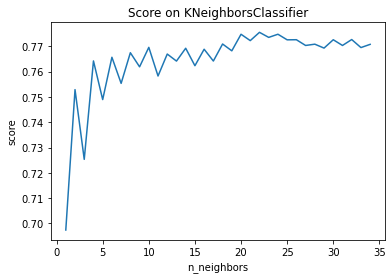

In [16]:
for i in range(len(main_prediction_mean)):
    print("Кол-во соседей:", i+1, "| Метрика - ", main_prediction_mean[i])
    
plt.plot(range(1, 35), main_prediction_mean)
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.title("Score on KNeighborsClassifier")
plt.show()

Максимальный результат:

In [17]:
np.argmax(main_prediction_mean)+1

22

In [18]:
%%time
prediction_mean = []
for j in range(len(ar)):
        X_train, X_test, y_train, y_test = \
        train_test_split(np.array(ar[j][0]), np.array(ar[j][1]), test_size=0.25, shuffle = False)
        X_train = np.delete(X_train, [1,2,18,19], axis=1)
        X_test  = np.delete(X_test, [1,2,18,19], axis=1)
        neigh = KNeighborsClassifier(n_neighbors=22)
        neigh.fit(X_train, y_train)
        prediction = neigh.predict(X_test)
        prediction_mean.append((np.mean(prediction == y_test)))
        print (series.index[j]," : ", np.mean(prediction == y_test))
np.array(prediction_mean).mean()

Albury  :  0.7941567065073041
BadgerysCreek  :  0.8237704918032787
Cobar  :  0.8433734939759037
CoffsHarbour  :  0.7577807848443843
Moree  :  0.8571428571428571
Newcastle  :  0.7496617050067659
NorahHead  :  0.723055934515689
NorfolkIsland  :  0.6639676113360324
Penrith  :  0.8070175438596491
Richmond  :  0.8116531165311653
Sydney  :  0.7341317365269461
SydneyAirport  :  0.7606382978723404
WaggaWagga  :  0.7956989247311828
Williamtown  :  0.7449139280125195
Wollongong  :  0.7882037533512064
Canberra  :  0.8105263157894737
Tuggeranong  :  0.7973333333333333
MountGinini  :  0.7262723521320495
Ballarat  :  0.7516512549537648
Bendigo  :  0.8102766798418972
Sale  :  0.8
MelbourneAirport  :  0.7729083665338645
Melbourne  :  0.7372742200328407
Mildura  :  0.9002659574468085
Nhil  :  0.8142493638676844
Portland  :  0.5874499332443258
Watsonia  :  0.764
Dartmoor  :  0.6168478260869565
Brisbane  :  0.8065739570164349
Cairns  :  0.6880856760374833
GoldCoast  :  0.7597315436241611
Townsville  :  0

0.7755272769227161

## Вывод

<table>
  <tr>
    <td></td>
    <td><b>Наивный Байес</b></td>
    <td><b>Логистическая регрессия</b></td>
    <td><b>Ближайшие соседи</b></td>
  </tr>
    <tr>
    <td><b>Время работы</b></td>
    <td>159 ms</td>
    <td>1.99 s</td>
    <td>3.54 s</td>
  </tr>
    <tr>
    <td><b>Accuracy</b></td>
    <td>0.94</td>
    <td>0.99</td>
    <td>0.78</td>
  </tr>
</table>